# Digits Recognition

In [1]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

<Figure size 640x480 with 0 Axes>

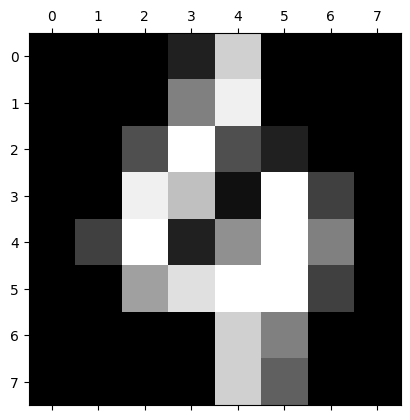

In [2]:
digits = datasets.load_digits()

print(digits.DESCR)


print(digits.data)


print(digits.target)


plt.gray() 

plt.matshow(digits.images[100])

plt.show()

<Figure size 640x480 with 0 Axes>

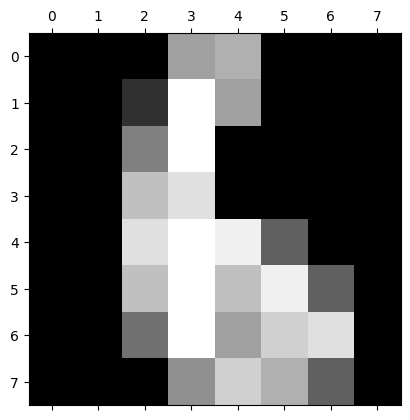

In [8]:
plt.gray() 
plt.matshow(digits.images[88])
plt.show()

In [10]:
print(digits.target[88])

6


In [19]:
dataimagelength = len(digits.images)
X = digits.images.reshape((dataimagelength,-1))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [20]:
Y = digits.target
Y

array([0, 1, 2, ..., 8, 9, 8])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(Y_train.shape)
print(X_test.shape)

(1347,)
(450, 64)


In [23]:
from sklearn import svm
model = svm.SVC(gamma=0.001)
model.fit(X_train,Y_train)

SVC(gamma=0.001)

[1]




C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10404\1339532964.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('%i' %result)


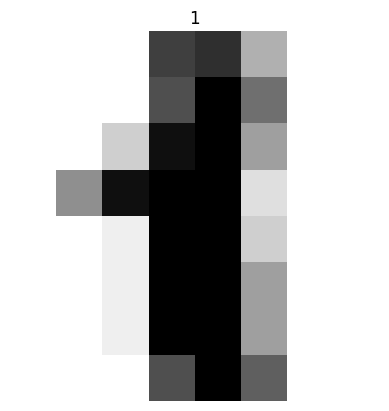

In [25]:
n = 1
result = model.predict(digits.images[n].reshape((1,-1)))
plt.imshow(digits.images[n],cmap=plt.cm.gray_r,interpolation='nearest')
print(result)
print("\n")
plt.axis('off')
plt.title('%i' %result)
plt.show()
     

In [26]:
Y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy of model: {0}%".format(accuracy_score(Y_test,Y_pred) * 100))

Accuracy of model: 99.55555555555556%


In [28]:
from sklearn import svm
from sklearn.metrics import accuracy_score

model1 = svm.SVC(kernel="linear")
model13 = svm.SVC(gamma=0.001)
model14 = svm.SVC(gamma=0.001, C=8.1)

model1.fit(X_train, Y_train)
model13.fit(X_train, Y_train)
model14.fit(X_train, Y_train)

Y_predModel1 = model1.predict(X_test)
Y_predMode13 = model13.predict(X_test)
Y_predMode14 = model14.predict(X_test)

print("Accuracy of Model 1: {:.2f}%".format(accuracy_score(Y_test, Y_predModel1) * 100))
print("Accuracy of Model 3: {:.2f}%".format(accuracy_score(Y_test, Y_predMode13) * 100))
print("Accuracy of Model 4: {:.2f}%".format(accuracy_score(Y_test, Y_predMode14) * 100))

Accuracy of Model 1: 97.11%
Accuracy of Model 3: 99.56%
Accuracy of Model 4: 99.33%


In [ ]:
fig = plt.figure(figsize=(8, 3))

plt.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Cluster Center Images')

<Figure size 800x300 with 0 Axes>

In [32]:
#Building the model

model_k = KMeans(n_clusters=10, random_state=42)

model_k.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

In [34]:
model_k.predict(X_test)

array([3, 8, 3, 2, 2, 0, 7, 9, 8, 1, 3, 8, 2, 2, 2, 2, 7, 5, 1, 8, 8, 0,
       8, 4, 0, 1, 4, 9, 3, 9, 4, 0, 2, 8, 9, 4, 6, 7, 5, 7, 8, 2, 0, 0,
       9, 5, 0, 2, 3, 7, 9, 2, 0, 9, 5, 5, 9, 7, 2, 6, 5, 3, 6, 4, 3, 9,
       0, 2, 9, 7, 8, 6, 1, 7, 3, 7, 3, 3, 9, 0, 3, 6, 2, 5, 1, 6, 0, 1,
       7, 3, 9, 9, 6, 7, 0, 0, 4, 8, 1, 8, 1, 1, 3, 1, 9, 5, 0, 3, 4, 8,
       6, 4, 8, 9, 0, 0, 8, 5, 7, 9, 3, 1, 8, 4, 7, 0, 5, 2, 7, 1, 9, 9,
       9, 1, 9, 9, 1, 0, 9, 2, 3, 8, 2, 9, 2, 7, 1, 7, 1, 9, 9, 9, 9, 6,
       2, 7, 8, 9, 0, 0, 2, 0, 2, 1, 2, 5, 8, 8, 9, 9, 2, 7, 5, 0, 3, 2,
       6, 9, 2, 0, 4, 9, 2, 6, 5, 9, 6, 6, 5, 0, 0, 9, 0, 8, 5, 0, 8, 9,
       2, 4, 1, 5, 7, 4, 2, 4, 6, 6, 5, 9, 1, 9, 6, 9, 4, 0, 9, 2, 8, 9,
       6, 4, 9, 6, 0, 2, 3, 6, 6, 7, 2, 9, 6, 2, 6, 6, 3, 5, 0, 2, 7, 7,
       9, 0, 6, 0, 7, 1, 1, 0, 1, 3, 3, 0, 3, 0, 9, 1, 0, 5, 9, 3, 2, 1,
       9, 0, 4, 6, 8, 5, 6, 2, 4, 2, 6, 3, 2, 8, 8, 8, 4, 2, 0, 1, 3, 7,
       1, 6, 3, 4, 2, 9, 4, 1, 4, 6, 4, 2, 3, 9, 5,

In [33]:
for i in range(10):

  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)

  # Display images
  ax.imshow(model_k.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.show()